In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df=pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [6]:
df=df.drop(['EmployeeCount','EmployeeNumber','StandardHours'],axis=1)

In [7]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,0,17,3,2,9,6,0,8


In [8]:
df['Attrition'].value_counts()

,count
Attrition,
No,1233
Yes,237


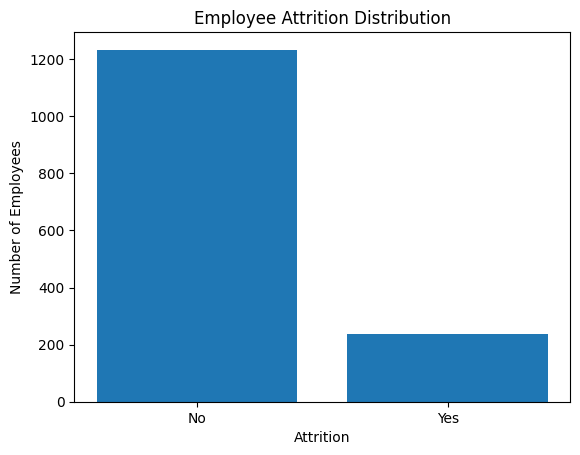

In [9]:
# prompt: give me code to plot graph for the column attrition

# Assuming df is already loaded as in the previous code

# Count the occurrences of each attrition value
attrition_counts = df['Attrition'].value_counts()

# Create a bar plot
#plt.figure(figsize=(8, 6))
plt.bar(attrition_counts.index, attrition_counts.values)
plt.xlabel('Attrition')
plt.ylabel('Number of Employees')
plt.title('Employee Attrition Distribution')
plt.show()

In [10]:
df=df.drop(['Over18'],axis=1)

In [11]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,No,17,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,No,15,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Yes,20,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,No,14,3,4,0,17,3,2,9,6,0,8


In [12]:
L=LabelEncoder()

In [13]:
df['Attrition']=L.fit_transform(df['Attrition'])
df['Gender']=L.fit_transform(df['Gender'])
df['OverTime']=L.fit_transform(df['OverTime'])

In [14]:
df['MaritalStatus'].value_counts()

,count
MaritalStatus,
Married,673
Single,470
Divorced,327


In [15]:
# prompt: give me code to check null values

# Check for null values in each column
null_counts = df.isnull().sum()
print(null_counts)

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64


In [16]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,0,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,1,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,1,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,0,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,3,1,41,4,2,Laboratory Technician,4,Married,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,4,1,42,2,3,Healthcare Representative,1,Married,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,1,87,4,2,Manufacturing Director,2,Married,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,4,1,63,2,2,Sales Executive,2,Married,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


In [17]:
# prompt: give me code to convert the attributes to numerical format using one hot encoding

# Assuming df is already loaded and preprocessed as in the previous code

# Get a list of categorical columns (excluding 'Attrition', 'Gender', 'OverTime' which are already label encoded)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Remove 'Attrition', 'Gender', and 'OverTime' if they are still in categorical_cols
if 'Attrition' in categorical_cols:
    categorical_cols.remove('Attrition')
if 'Gender' in categorical_cols:
    categorical_cols.remove('Gender')
if 'OverTime' in categorical_cols:
    categorical_cols.remove('OverTime')


# Perform one-hot encoding on the remaining categorical columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df=df.astype(int)
# Now 'df' contains the numerically encoded features
print(df.head())

   Age  Attrition  DailyRate  DistanceFromHome  Education  \
0   41          1       1102                 1          2   
1   49          0        279                 8          1   
2   37          1       1373                 2          2   
3   33          0       1392                 3          4   
4   27          0        591                 2          1   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2       0          94               3         2   
1                        3       1          61               2         2   
2                        4       1          92               2         1   
3                        4       0          56               3         1   
4                        1       1          40               3         1   

   JobSatisfaction  MonthlyIncome  MonthlyRate  NumCompaniesWorked  OverTime  \
0                4           5993        19479                   8         1   
1               

In [18]:
df

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,0,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,49,0,279,8,1,3,1,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,37,1,1373,2,2,4,1,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,4,0,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,27,0,591,2,1,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,3,1,41,4,2,4,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1466,39,0,613,6,1,4,1,42,2,3,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1467,27,0,155,4,3,2,1,87,4,2,2,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1468,49,0,1023,2,3,4,1,63,2,2,2,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0


In [21]:

#SMOTE - Synthetic Minority oversampling technique
# Assuming 'df' is your DataFrame and 'Attrition' is the target column
x = df.drop('Attrition', axis=1)  # Features
y = df['Attrition']  # Target variable

# Initialize SMOTE with a random state for reproducibility
smote = SMOTE(sampling_strategy='minority', random_state=42)

# Apply SMOTE to oversample the minority class
x_smote, y_smote = smote.fit_resample(x, y)

# Create a new DataFrame with the balanced data
balanced_df = pd.DataFrame(x_smote, columns=x.columns)
balanced_df['Attrition'] = y_smote

# Verify the class distribution
print(balanced_df['Attrition'].value_counts())

Attrition
1    1233
0    1233
Name: count, dtype: int64


In [34]:
y

,Attrition
0,1
1,0
2,1
3,0
4,0
...,...
2461,1
2462,1
2463,1
2464,1


In [22]:
balanced_df

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,Attrition
0,41,1102,1,2,2,0,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,3,1,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,4,1,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,4,0,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,27,591,2,1,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,31,759,10,3,3,1,69,3,1,3,2634,5895,1,0,12,3,3,0,4,4,2,4,4,3,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2462,40,1070,17,3,1,0,68,3,1,3,5195,4606,8,1,14,3,1,0,8,2,2,5,2,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2463,30,608,17,3,1,0,66,1,1,3,4586,24949,3,1,11,3,2,1,4,2,3,2,2,2,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2464,22,324,5,1,2,1,32,2,1,1,2648,4770,2,0,12,3,2,0,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [23]:
x=balanced_df.drop('Attrition',axis=1)
y=balanced_df['Attrition']

In [24]:
y

,Attrition
0,1
1,0
2,1
3,0
4,0
...,...
2461,1
2462,1
2463,1
2464,1


In [25]:
# prompt: having x and y variables i want test and train splits

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [26]:
x_train

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
463,26,471,24,3,3,1,66,1,1,4,2340,23213,1,1,18,3,2,0,1,3,1,1,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
1037,45,1448,29,3,2,1,55,3,3,4,9380,14720,4,1,18,3,4,2,10,4,4,3,1,1,2,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
1114,48,1108,15,4,3,0,65,3,1,1,2367,16530,8,0,12,3,4,1,10,3,2,8,2,7,6,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
1503,37,656,1,3,1,0,48,2,3,2,10705,15002,4,0,11,3,3,0,17,2,1,13,0,10,6,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1818,31,877,25,3,1,0,51,2,2,2,4638,3118,1,0,21,3,2,0,12,3,2,11,6,2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,29,877,10,3,1,0,78,1,1,3,3962,24760,4,1,12,3,3,0,4,3,2,2,2,2,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1095,33,589,28,4,2,1,79,3,2,3,5207,22949,1,1,12,3,2,1,15,3,3,15,14,5,7,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1130,35,750,28,3,2,1,46,4,2,3,3407,25348,1,0,17,3,4,2,10,3,2,10,9,6,8,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1294,41,447,5,3,2,1,85,4,2,2,6870,15530,3,0,12,3,1,0,11,3,1,3,2,1,2,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [27]:
x_test

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
1078,44,136,28,3,4,1,32,3,4,1,16328,22074,3,0,13,3,3,1,24,1,4,20,6,14,17,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1281,35,303,27,3,3,1,84,3,2,4,5813,13492,1,1,18,3,4,0,10,2,3,10,7,7,7,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
621,36,928,1,2,2,1,56,3,2,4,6201,2823,1,1,14,3,4,1,18,1,2,18,14,4,11,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1508,29,336,15,1,3,0,81,2,2,3,7478,22933,0,0,12,3,1,0,9,1,2,7,6,6,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1975,43,741,27,3,1,0,77,3,3,1,11401,10566,2,1,12,3,3,1,10,2,2,8,5,6,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2099,47,1073,7,3,2,0,62,3,5,2,19686,18500,2,0,12,3,4,0,23,0,3,14,9,8,6,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1836,29,477,23,2,4,1,73,1,1,3,2434,14742,1,1,23,4,2,0,1,2,2,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
303,31,218,7,3,2,1,100,4,2,4,6929,12241,4,0,11,3,2,1,10,3,2,8,7,7,7,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
1864,25,1123,3,3,3,0,80,3,1,1,2351,8360,3,1,12,3,3,0,4,4,3,3,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [28]:
y_train

,Attrition
463,1
1037,0
1114,0
1503,1
1818,1
...,...
1638,1
1095,0
1130,0
1294,0


In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = pd.DataFrame(data = scaler.fit_transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(data = scaler.transform(x_test), columns=x_test.columns)

In [30]:
x_train

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,-1.056273,-0.810269,1.859776,0.259179,0.484652,0.996962,0.004897,-2.118998,-0.812190,1.427439,-0.794473,1.243620,-0.687818,1.585923,0.882119,-0.33032,-0.484010,-0.745558,-1.185628,0.328371,-2.209238,-0.856835,-1.040835,-0.660521,-1.027779,-0.413547,0.801227,0.962175,-0.580473,-0.652599,-0.298163,-0.519423,-0.193258,4.018436,-0.140173,2.510718,-0.208294,-0.248853,-0.191842,-0.404255,-0.484577,-0.223726,-0.711684,1.564466
1,1.049080,1.789977,2.512724,0.259179,-0.456030,0.996962,-0.566225,0.651999,1.120989,1.427439,0.844957,0.047063,0.577066,1.585923,0.882119,-0.33032,1.448110,1.748490,0.019281,1.130783,1.904659,-0.517576,-0.745805,-0.324553,-0.430349,-0.413547,0.801227,0.962175,-0.580473,-0.652599,-0.298163,-0.519423,-0.193258,4.018436,-0.140173,-0.398292,-0.208294,4.018436,-0.191842,-0.404255,-0.484577,-0.223726,1.405119,-0.639196
2,1.381504,0.885081,0.684470,1.293795,0.484652,-1.003047,-0.047023,0.651999,-0.812190,-1.344961,-0.788185,0.302069,2.263577,-0.630548,-0.873513,-0.33032,1.448110,0.501466,0.019281,0.328371,-0.837939,0.330571,-0.450774,1.691255,0.764510,-0.413547,0.801227,0.962175,-0.580473,-0.652599,-0.298163,-0.519423,5.174422,-0.248853,-0.140173,-0.398292,-0.208294,-0.248853,-0.191842,2.473688,-0.484577,-0.223726,1.405119,-0.639196
3,0.162616,-0.317899,-1.143785,0.259179,-1.396713,-1.003047,-0.929666,-0.733499,1.120989,-0.420827,1.153515,0.086793,0.577066,-0.630548,-1.166118,-0.33032,0.482050,-0.745558,0.956432,-0.474042,-2.209238,1.178717,-1.040835,2.699159,0.764510,-0.413547,-1.248085,-1.039312,1.722732,1.532334,-0.298163,-0.519423,-0.193258,-0.248853,-0.140173,-0.398292,-0.208294,-0.248853,-0.191842,-0.404255,2.063654,-0.223726,-0.711684,-0.639196
4,-0.502232,0.270284,1.990366,0.259179,-1.396713,-1.003047,-0.773905,-0.733499,0.154399,-0.420827,-0.259329,-1.587513,-0.687818,-0.630548,1.759935,-0.33032,-0.484010,-0.745558,0.287038,0.328371,-0.837939,0.839459,0.729348,0.011415,1.063225,-0.413547,-1.248085,-1.039312,-0.580473,-0.652599,-0.298163,-0.519423,-0.193258,-0.248853,-0.140173,-0.398292,-0.208294,-0.248853,-0.191842,-0.404255,-0.484577,-0.223726,-0.711684,1.564466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1967,-0.723849,0.270284,0.031522,0.259179,-1.396713,-1.003047,0.627939,-2.118998,-0.812190,0.503306,-0.416752,1.461573,0.577066,1.585923,-0.873513,-0.33032,0.482050,-0.745558,-0.783992,0.328371,-0.837939,-0.687205,-0.450774,0.011415,-0.430349,-0.413547,0.801227,-1.039312,-0.580473,-0.652599,-0.298163,-0.519423,-0.193258,-0.248853,-0.140173,-0.398292,-0.208294,-0.248853,-0.191842,-0.404255,-0.484577,-0.223726,1.405119,-0.639196
1968,-0.280616,-0.496216,2.382135,1.293795,-0.456030,0.996962,0.679859,0.651999,0.154399,0.503306,-0.126824,1.206426,-0.687818,1.585923,-0.873513,-0.33032,-0.484010,0.501466,0.688674,0.328371,0.533360,1.517976,3.089592,1.019319,1.063225,-0.413547,0.801227,0.962175,-0.580473,1.532334,-0.298163,-0.519423,-0.193258,-0.248853,-0.140173,2.510718,-0.208294,-0.248853,-0.191842,-0.404255,-

In [45]:
from sklearn.decomposition import PCA
n = 40
pca = PCA(n_components=n)
principal_components = pca.fit_transform(x_train)
PCA_columns = ['PC'+str(i) for i in range(1, n+1)]

# Convert the principal components to a DataFrame for visualization
x_train_PCA = pd.DataFrame(data=principal_components, columns=PCA_columns)

x_train_PCA.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40
0,-3.166351,-1.026424,-0.609966,-0.297506,0.673453,1.221857,-0.683393,-0.804446,-0.847946,-0.486114,1.313568,1.257083,-1.840141,2.047281,1.889649,-1.835182,-0.209906,-1.769428,0.870982,0.852711,1.209174,0.818121,-0.059534,1.295609,3.199259,-1.534756,1.348850,-0.283446,0.099281,-0.151538,1.217892,-0.423787,0.599167,-0.064004,-0.297756,-0.682926,-0.356868,0.048748,-0.158828,-0.024517
1,1.247596,-1.975951,3.270887,1.425988,0.452397,-0.287308,0.615930,0.070214,0.898559,1.335335,0.588210,-0.233767,-3.326066,-0.434436,3.781965,0.657451,0.300577,-0.904542,0.008637,0.425214,2.509189,2.757531,-0.252388,0.638972,0.339997,0.316521,1.253064,-0.926242,-0.121202,0.860086,-0.606774,-0.426746,0.910200,-0.409345,-0.089608,-0.911385,-0.439073,-0.320708,-0.064435,-0.488043
2,0.755420,-1.909910,1.038968,0.712709,-1.289580,0.686081,-1.218999,-0.141760,2.744962,-1.488726,-0.566565,2.827197,-0.605543,0.755360,-0.038868,0.472890,1.878389,1.628698,1.071012,-0.084386,0.506764,-2.140906,2.367758,1.050384,-3.146520,0.322462,-0.488628,-0.118932,0.463438,0.542446,0.641090,-0.240038,1.018213,-0.319208,0.390344,0.123172,0.471955,-1.005683,-0.441440,0.088721
3,2.204620,2.746402,-2.271954,0.536232,-0.796003,-0.026084,-0.446837,1.485721,-0.336157,-0.915532,-0.063343,-0.016094,0.052008,0.020337,0.112681,-0.213861,-1.884630,0.315302,-0.112883,-0.683106,-0.184286,-1.423993,0.699867,0.477173,-0.246941,1.399891,0.092304,-0.329547,0.616684,-1.063947,0.595521,0.178348,1.580130,-0.618182,-0.913981,1.650897,-0.768253,-1.359088,-0.247055,0.472678
4,0.031727,0.648905,-2.846609,-1.688081,0.490774,-0.946720,-1.103187,-0.686925,-0.007217,-0.537350,-0.983997,-0.257835,-0.444910,-0.784033,0.113412,0.332444,0.682451,-0.525248,-0.314854,-1.336764,1.318454,0.663425,0.391721,1.199486,0.141008,0.117791,0.208824,0.166802,-0.185479,-0.003922,-0.356681,-0.249084,-0.711891,-1.007960,0.335070,-1.195113,-0.786775,0.151588,-0.240832,-0.063203


In [47]:
principal_components = pca.fit_transform(x_test)
PCA_columns = ['PC'+str(i) for i in range(1, n+1)]

# Convert the principal components to a DataFrame for visualization
x_test_PCA = pd.DataFrame(data=principal_components, columns=PCA_columns)

x_test_PCA.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40
0,6.366124,2.789692,1.136698,-1.609268,-1.078389,-0.930202,0.727168,-0.351406,-0.674541,0.512509,-0.278979,2.314772,-0.635901,0.539821,-2.836282,1.016966,1.169162,-0.049899,2.277424,-2.073378,1.108090,1.591507,-1.443659,2.084539,-2.368809,-1.083675,0.439623,2.170703,-1.197877,0.408439,-0.353144,-1.043451,1.165041,-0.992213,0.513987,-0.149221,1.833301,-0.976520,-0.679145,0.601610
1,1.938329,-1.432532,2.473372,1.169425,0.719047,0.701743,1.068758,-1.125079,-1.321536,1.595246,-0.577183,0.368030,-1.624619,-1.387884,0.159895,0.425539,0.685716,1.463850,0.738137,-0.352540,-0.468537,0.006540,-2.127566,-0.539635,-0.233031,-0.382256,-0.695544,0.691617,1.003447,-0.140762,0.124591,0.252764,0.005884,0.373680,0.864357,-0.304251,0.382428,0.278768,-0.138503,0.293930
2,3.757750,-0.796556,0.740562,1.803968,0.656898,-1.432654,1.532069,-2.737170,-0.936640,-0.306364,1.139438,-1.147898,0.662605,-0.399405,1.345793,1.074885,0.379978,0.602953,-0.224676,0.382165,-0.203208,1.378223,-1.625410,-1.230633,-0.934745,-0.964301,-0.318244,0.147552,-0.442796,-0.051884,1.020714,-0.114413,-1.138192,0.462944,-0.085757,0.623320,0.047253,0.700040,-0.154787,-0.260686
3,-0.158742,-0.870490,2.945044,-2.129572,-0.511069,-1.327085,-0.416725,0.473073,-0.041163,-0.674714,0.022322,1.038083,0.174748,-0.116785,-0.365377,1.770372,0.878753,-0.317309,-0.244296,0.520273,-1.278310,-0.489813,-0.278406,0.933145,1.254640,1.382399,0.392804,0.504118,-0.525227,-0.553112,0.438600,0.153794,0.637579,1.174781,0.074433,0.548697,0.231497,0.191853,-0.056760,-0.081282
4,1.721506,-0.612635,0.562022,-2.368130,-1.162964,-1.636785,-0.637493,0.045756,0.162595,-0.170939,-1.763610,-0.260835,-0.813742,-0.361951,1.079099,-0.628219,0.993793,1.169851,0.568426,-0.483313,0.028673,-0.833563,-0.581472,-0.647547,-0.955264,-0.825614,-0.197367,-0.458928,-0.315154,-0.059878,-0.433993,0.268527,0.157043,-0.590094,-0.118438,0.855099,0.268727,-0.095673,0.162486,-0.430279


In [43]:
# prompt: generate code for logistic regression for x_train and y_train

# Initialize and train the logistic regression model
log_reg = linear_model.LogisticRegression()
log_reg.fit(x_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.8967611336032388
Confusion Matrix:
[[230  20]
 [ 31 213]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       250
           1       0.91      0.87      0.89       244

    accuracy                           0.90       494
   macro avg       0.90      0.90      0.90       494
weighted avg       0.90      0.90      0.90       494



In [48]:
log_reg = linear_model.LogisticRegression()
log_reg.fit(x_train_PCA, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(x_test_PCA)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.5182186234817814
Confusion Matrix:
[[102 148]
 [ 90 154]]
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.41      0.46       250
           1       0.51      0.63      0.56       244

    accuracy                           0.52       494
   macro avg       0.52      0.52      0.51       494
weighted avg       0.52      0.52      0.51       494



In [49]:
# prompt: code to use different regression models on this project for x_train, y_train and test the accuracy, confusion matrix and classification report for the same

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


# ... (Your existing code) ...


# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(x_train, y_train)
y_pred_rf = rf_classifier.predict(x_test)
print("Random Forest Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_rf)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_rf)}")

# Support Vector Classifier
svm_classifier = SVC(random_state=42)
svm_classifier.fit(x_train, y_train)
y_pred_svm = svm_classifier.predict(x_test)
print("\nSupport Vector Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_svm)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_svm)}")


# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(x_train, y_train)
y_pred_dt = dt_classifier.predict(x_test)
print("\nDecision Tree Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_dt)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_dt)}")


# K-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(x_train, y_train)
y_pred_knn = knn_classifier.predict(x_test)
print("\nK-Nearest Neighbors Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_knn)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_knn)}")

Random Forest Classifier:
Accuracy: 0.9311740890688259
Confusion Matrix:
[[242   8]
 [ 26 218]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       250
           1       0.96      0.89      0.93       244

    accuracy                           0.93       494
   macro avg       0.93      0.93      0.93       494
weighted avg       0.93      0.93      0.93       494


Support Vector Classifier:
Accuracy: 0.9149797570850202
Confusion Matrix:
[[245   5]
 [ 37 207]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       250
           1       0.98      0.85      0.91       244

    accuracy                           0.91       494
   macro avg       0.92      0.91      0.91       494
weighted avg       0.92      0.91      0.91       494


Decision Tree Classifier:
Accuracy: 0.8259109311740891
Confusion Matrix:
[[204  46]
 [ 40 204]]
Classific

In [50]:
# prompt: i want to use grid search

from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Create a GridSearchCV object for Random Forest
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid_rf,
                           cv=5, scoring='accuracy')  # Use 5-fold cross-validation

# Fit the GridSearchCV object to the training data
grid_search_rf.fit(x_train, y_train)

# Get the best parameters and best score
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best accuracy for Random Forest:", grid_search_rf.best_score_)

# Use the best estimator to make predictions on the test set
best_rf_classifier = grid_search_rf.best_estimator_
y_pred_rf_best = best_rf_classifier.predict(x_test)


print("\nRandom Forest Classifier (Best Parameters):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf_best)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_rf_best)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_rf_best)}")


#Similarly you can perform GridSearch for other classifiers
# Define the parameter grid for Support Vector Classifier
param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid_search_svc = GridSearchCV(estimator=SVC(random_state=42), param_grid=param_grid_svc, cv=5, scoring='accuracy')
grid_search_svc.fit(x_train, y_train)
print("\nBest parameters for SVC:", grid_search_svc.best_params_)
print("Best accuracy for SVC:", grid_search_svc.best_score_)

best_svc = grid_search_svc.best_estimator_
y_pred_svc_best = best_svc.predict(x_test)

print("\nSupport Vector Classifier (Best Parameters):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svc_best)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_svc_best)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_svc_best)}")

Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best accuracy for Random Forest: 0.9163104799845788

Random Forest Classifier (Best Parameters):
Accuracy: 0.9331983805668016
Confusion Matrix:
[[242   8]
 [ 25 219]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       250
           1       0.96      0.90      0.93       244

    accuracy                           0.93       494
   macro avg       0.94      0.93      0.93       494
weighted avg       0.94      0.93      0.93       494


Best parameters for SVC: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best accuracy for SVC: 0.9137904003084237

Support Vector Classifier (Best Parameters):
Accuracy: 0.9149797570850202
Confusion Matrix:
[[245   5]
 [ 37 207]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       250
           1       0.98  